## Observations and Insights 

# Observation:
(1) With Matlab after analysis we can easily tell how many drug regimen were used and what is an impact on Tumor size.

(2) We can easily identify recived drug regimen and impact on Tumor size based on Male Vs. Female.

(3) Get the Correlation and Regression on Drug Regimena and Tumor size.

In [29]:
%matplotlib notebook

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import sklearn.datasets as dta

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [31]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [32]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
# Display the data table for preview

combine_data=pd.merge(mouse_metadata,study_results, left_on = 'Mouse ID', right_on = 'Mouse ID', how = 'inner')
combine_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
tnm_1=combine_data['Mouse ID'].nunique()
tnm_df1= pd.DataFrame({'Number of Mice': [tnm_1]})
tnm_df1


,Number of Mice
0,249


In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# use smaller dataset to merge on first
dm_MT =combine_data[combine_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
dm_MT

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = combine_data.loc[combine_data.duplicated(['Mouse ID','Timepoint']),['Mouse ID','Timepoint']]
dup_mice

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_data.loc[combine_data['Mouse ID']!='g989']
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice in the clean DataFrame.
number_mice_1=clean_df['Mouse ID'].count()
total_number_df= pd.DataFrame({'Number of Mice':[number_mice_1]})
total_number_df


,Number of Mice
0,1880


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

ts = pd.Series(combine_data['Tumor Volume (mm3)'].values, index=combine_data['Drug Regimen'])
summary_data = pd.DataFrame(columns=['Mean', 'Median', 'Variance', 'Standard deviation' , 'SEM'], index = ['Infubinol','Ceftamin','Capomulin','Ramicane','Naftisol','Zoniferol','Ketapril','Placebo','Propriva','Stelasyn'])

Infubinol=ts[ts.index=='Infubinol']
Ceftamin=ts[ts.index=='Ceftamin']
Capomulin = ts[ts.index =='Capomulin']
Ramicane=ts[ts.index=='Ramicane']
Naftisol=ts[ts.index=='Naftisol']
Zoniferol=ts[ts.index=='Zoniferol']
Ketapril=ts[ts.index=='Ketapril']
Placebo=ts[ts.index=='Placebo']
Propriva=ts[ts.index=='Propriva']
Stelasyn=ts[ts.index=='Stelasyn']

summary_data.loc['Infubinol'] = pd.Series({'Mean': round(Infubinol.mean(),2), 'Median': round(Infubinol.median(),2),'Variance': round(Infubinol.var(),2), 'Standard deviation': round(Infubinol.std(),2),'SEM': round(Infubinol.sem(),2)})
summary_data.loc['Ceftamin'] = pd.Series({'Mean': round(Ceftamin.mean(),2), 'Median': round(Ceftamin.median(),2),'Variance': round(Ceftamin.var(),2), 'Standard deviation': round(Ceftamin.std(),2),'SEM': round(Ceftamin.sem(),2)})
summary_data.loc['Capomulin'] = pd.Series({'Mean': round(Capomulin.mean(),2), 'Median': round(Capomulin.median(),2),'Variance': round(Capomulin.var(),2), 'Standard deviation': round(Capomulin.std(),2),'SEM': round(Capomulin.sem(),2)})
summary_data.loc['Ramicane'] = pd.Series({'Mean': round(Ramicane.mean(),2), 'Median': round(Ramicane.median(),2),'Variance': round(Ramicane.var(),2), 'Standard deviation': round(Ramicane.std(),2),'SEM': round(Ramicane.sem(),2)})
summary_data.loc['Naftisol'] = pd.Series({'Mean': round(Naftisol.mean(),2), 'Median': round(Naftisol.median(),2),'Variance': round(Naftisol.var(),2), 'Standard deviation': round(Naftisol.std(),2),'SEM': round(Naftisol.sem(),2)})
summary_data.loc['Zoniferol'] = pd.Series({'Mean': round(Zoniferol.mean(),2), 'Median': round(Zoniferol.median(),2),'Variance': round(Zoniferol.var(),2), 'Standard deviation': round(Zoniferol.std(),2),'SEM': round(Zoniferol.sem(),2)})
summary_data.loc['Ketapril'] = pd.Series({'Mean': round(Ketapril.mean(),2), 'Median': round(Ketapril.median(),2),'Variance': round(Ketapril.var(),2), 'Standard deviation': round(Ketapril.std(),2),'SEM': round(Ketapril.sem(),2)})
summary_data.loc['Placebo'] = pd.Series({'Mean': round(Placebo.mean(),2), 'Median': round(Placebo.median(),2),'Variance': round(Placebo.var(),2), 'Standard deviation': round(Placebo.std(),2),'SEM': round(Placebo.sem(),2)})
summary_data.loc['Propriva'] = pd.Series({'Mean': round(Propriva.mean(),2), 'Median': round(Propriva.median(),2),'Variance': round(Propriva.var(),2), 'Standard deviation': round(Propriva.std(),2),'SEM': round(Propriva.sem(),2)})
summary_data.loc['Stelasyn'] = pd.Series({'Mean': round(Stelasyn.mean(),2), 'Median': round(Infubinol.median(),2),'Variance': round(Stelasyn.var(),2), 'Standard deviation': round(Stelasyn.std(),2),'SEM': round(Stelasyn.sem(),2)})
summary_data

,Mean,Median,Variance,Standard deviation,SEM
Infubinol,52.88,51.82,43.13,6.57,0.49
Ceftamin,52.59,51.78,39.29,6.27,0.47
Capomulin,40.68,41.56,24.95,4.99,0.33
Ramicane,40.22,40.67,23.49,4.85,0.32
Naftisol,54.33,52.51,66.17,8.13,0.6
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.7,68.55,8.28,0.6
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Stelasyn,54.23,51.82,59.45,7.71,0.57


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

tv_df=round(combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),2).to_frame()
tv_df.rename(columns={'Tumor Volume (mm3)': 'Mean'}, inplace = True)
tv_df['Median']= round(combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),2).to_frame()
tv_df['Variance']=round(combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),2).to_frame()
tv_df['Standard Deviation']=round(combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),2).to_frame()
tv_df['SEM']=round(combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem(),2).to_frame()
tv_df.style.set_caption('Summary Statistics table for the Tumor Volume (mm3)')


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.680000,41.560000,24.950000,4.990000,0.330000
Ceftamin,52.590000,51.780000,39.290000,6.270000,0.470000
Infubinol,52.880000,51.820000,43.130000,6.570000,0.490000
Ketapril,55.240000,53.700000,68.550000,8.280000,0.600000
Naftisol,54.330000,52.510000,66.170000,8.130000,0.600000
Placebo,54.030000,52.290000,61.170000,7.820000,0.580000
Propriva,52.320000,50.850000,42.350000,6.510000,0.510000
Ramicane,40.220000,40.670000,23.490000,4.850000,0.320000
Stelasyn,54.230000,52.430000,59.450000,7.710000,0.570000


## Bar and Pie Charts

<IPython.core.display.Javascript object>


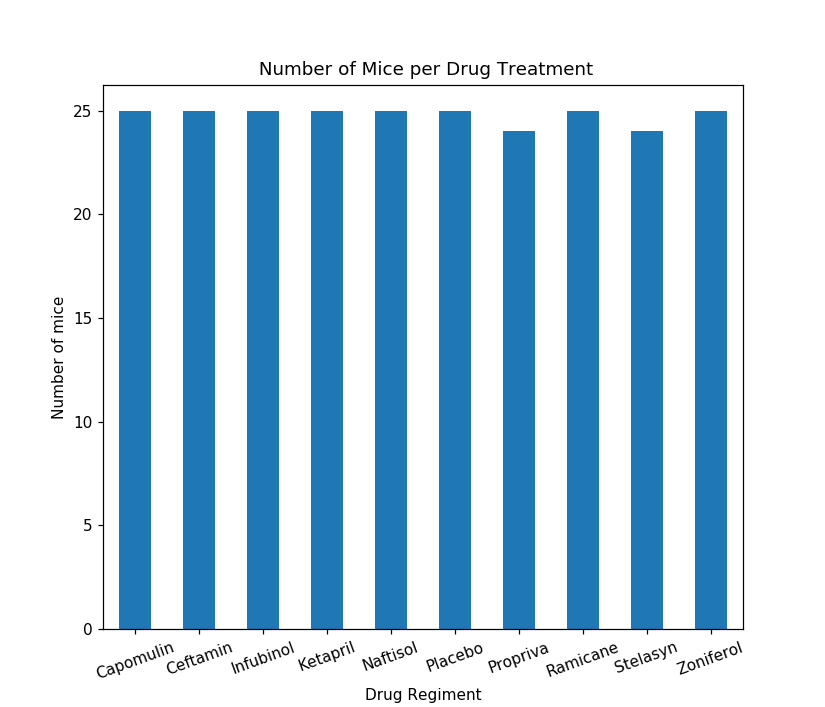

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
df2= clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame()
df3 = clean_df.drop_duplicates(subset= ['Mouse ID'])
df3.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().plot.bar()
plt.title(' Number of Mice per Drug Treatment')
plt.xlabel('Drug Regiment')
plt.ylabel('Number of mice')
plt.xticks(rotation=20)
plt.show()


<IPython.core.display.Javascript object>


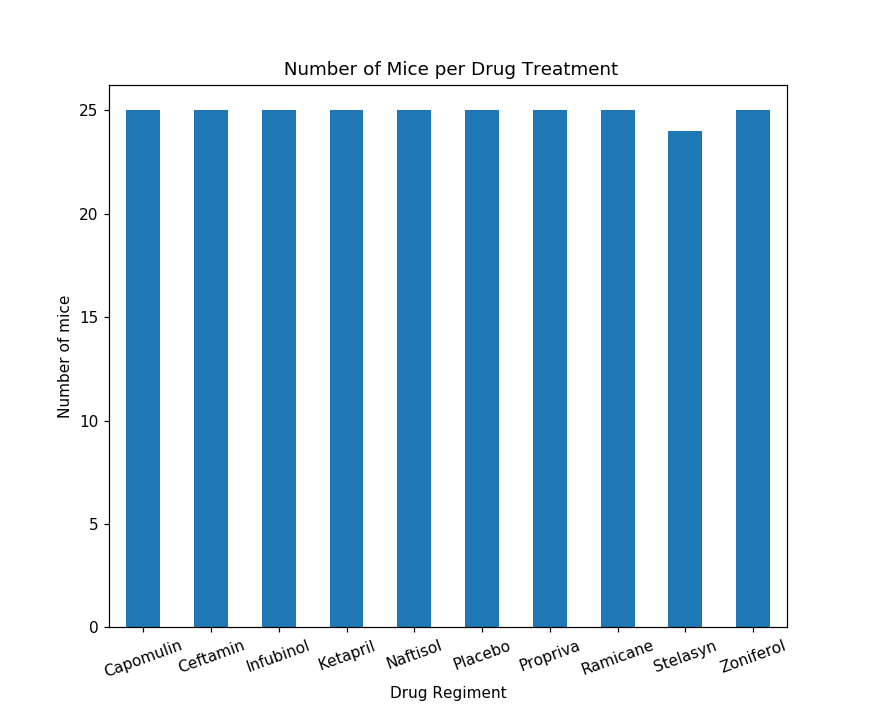

In [44]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
df3= combine_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().to_frame()
df4 = combine_data.drop_duplicates(subset= ['Mouse ID'])
df4.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().plot.bar()
plt.title(' Number of Mice per Drug Treatment')
plt.xlabel('Drug Regiment')
plt.ylabel('Number of mice')
plt.xticks(rotation=20)
plt.show()

<IPython.core.display.Javascript object>


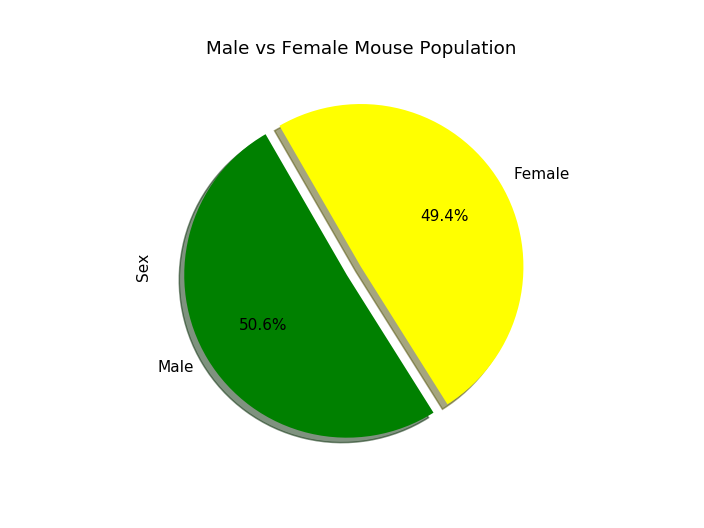

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_x = combine_data['Sex'].value_counts()
label_y = ['Male', 'Female']
#Set parameters for pie graph asthetics
color1 = ['green','yellow']
color2 = ['blue','orange']
explode = [0.1, 0]

#Generate pie plot
sex_x.plot(kind='pie', explode=explode,  colors=color1, autopct='%1.1f%%', shadow = True, startangle=120)

#Add title
plt.title('Male vs Female Mouse Population')
plt.show()

<IPython.core.display.Javascript object>


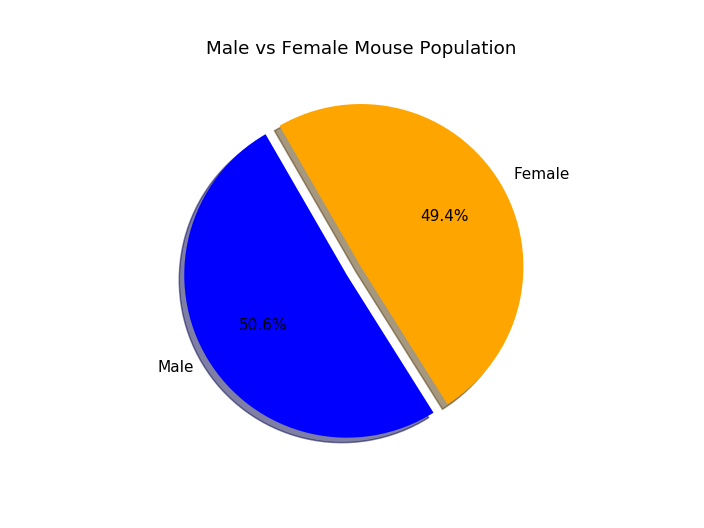

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_x, explode=explode, labels=label_y, colors=color2, autopct='%1.1f%%', shadow=True, startangle=120)
#Add Title
plt.title('Male vs Female Mouse Population')
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

dd_df=combine_data.drop_duplicates(subset='Mouse ID', keep='last')
dd_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [48]:
dd_df1=dd_df[dd_df['Timepoint']==45]
dd_df1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [49]:
# Put treatments into a list for for loop (and later for plot labels)

dr=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tum_list = []
tum_list_lq = []
tum_list_uq = []
tum_list_iqr = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset    
# Determine outliers using upper and lower bounds

for drug in dr:
    tum_vol =dd_df1.loc[dd_df1['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tum_list.append(tum_vol)
    quarntile=tum_vol.quantile([.25,.5,.75])
    lowerq=quarntile.iloc[0]
    upperq=quarntile.iloc[2]                    
    iqr=upperq-lowerq
    tum_list_lq.append(quarntile.iloc[0])
    tum_list_uq.append (quarntile.iloc[2] )                   
    tum_list_iqr.append(upperq-lowerq)
 
print(f'Tumor Volume-The lower quartile is: {lowerq} ')
print(f'Tumor Volume-The upper quartile is: {upperq}')
print(f'Interquartile range is: {iqr}')
print(f'median of tumor volume is: {quarntile[0.5]}')

Tumor Volume-The lower quartile is: 61.43389223 
Tumor Volume-The upper quartile is: 67.52748237
Interquartile range is: 6.093590140000003
median of tumor volume is: 64.29983003


<IPython.core.display.Javascript object>


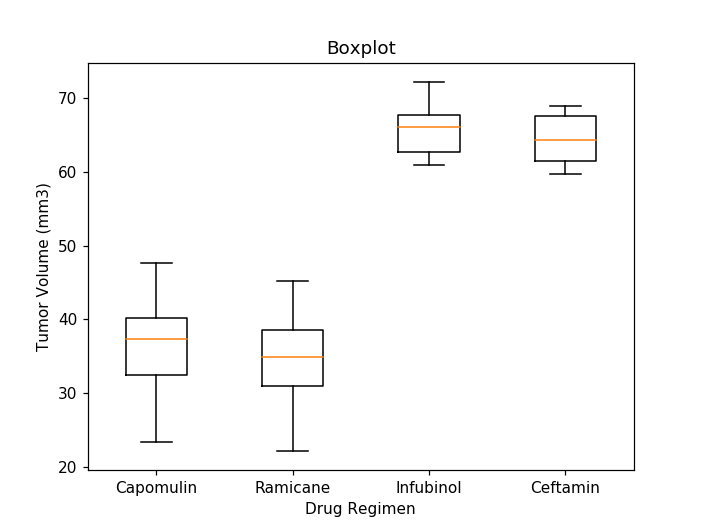

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_ca=dd_df1[(dd_df1['Drug Regimen']=='Capomulin') ] 
box_ra=dd_df1[(dd_df1['Drug Regimen']=='Ramicane') ] 
box_if=dd_df1[(dd_df1['Drug Regimen']=='Infubinol') ] 
box_cf=dd_df1[(dd_df1['Drug Regimen']=='Ceftamin') ]
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
data =[box_ca['Tumor Volume (mm3)'], box_ra['Tumor Volume (mm3)'],box_if['Tumor Volume (mm3)'], box_cf['Tumor Volume (mm3)']]
ax1.boxplot(data,  labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

In [51]:
# Determine mid-outliers for capomulin
outliers_mild_ca=dd_df1[(dd_df1['Drug Regimen']=='Capomulin') ]
outliers_mild_ca=outliers_mild_ca[(outliers_mild_ca['Tumor Volume (mm3)']< tum_list_lq[0] -1.5*tum_list_iqr[0]) | (outliers_mild_ca['Tumor Volume (mm3)']> tum_list_lq[0] + 1.5*tum_list_iqr[0])]
outliers1 = outliers_mild_ca[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
outliers1.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
440,i557,Capomulin,47.685963


In [52]:
# Determine mid-outliers for Ramicane
outliers_mild_ra=dd_df1[(dd_df1['Drug Regimen']=='Ramicane') ] # mild outliers
outliers_mild_ra=outliers_mild_ra[(outliers_mild_ra['Tumor Volume (mm3)']< tum_list_lq[1] -1.5*tum_list_iqr[1]) | (outliers_mild_ra['Tumor Volume (mm3)']> tum_list_lq[1] + 1.5*tum_list_iqr[1])]
outliers2 = outliers_mild_ra[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
outliers2.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
420,q597,Ramicane,45.220869
430,a444,Ramicane,43.047543


In [53]:
# Determine mid-outliers for Infubinol
outliers_mild_if=dd_df1[(dd_df1['Drug Regimen']=='Infubinol') ]
outliers_mild_if=outliers_mild_if[(outliers_mild_if['Tumor Volume (mm3)']< tum_list_lq[2] -1.5*tum_list_iqr[2]) | (outliers_mild_if['Tumor Volume (mm3)']>tum_list_lq[2] + 1.5*tum_list_iqr[2])]
outliers3 = outliers_mild_if[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
outliers3.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
637,c139,Infubinol,72.226731


## Line and Scatter Plots

In [54]:
#print dataframe for mouse treated with Capomulin
capo_df = clean_df.loc[combine_data['Drug Regimen']=='Capomulin']
capo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


<IPython.core.display.Javascript object>


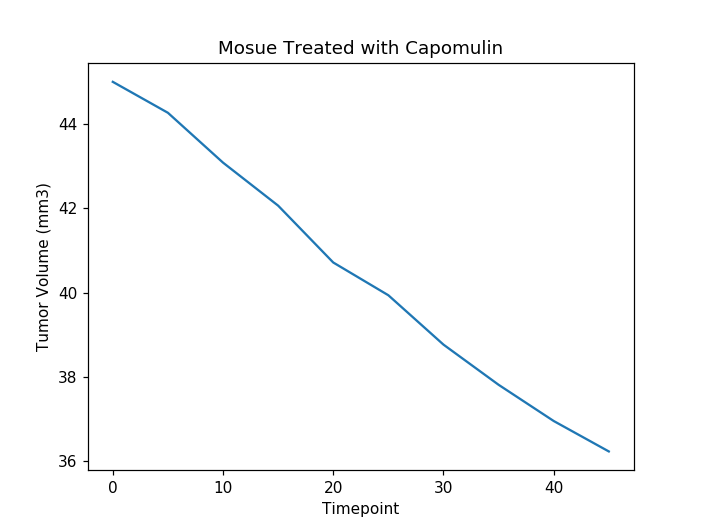

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
y_axis=capo_df.groupby('Timepoint').mean()['Tumor Volume (mm3)']
x_axis=capo_df.groupby('Timepoint').count().reset_index()['Timepoint']
#capo_df.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mosue Treated with Capomulin')
plt.plot(x_axis,y_axis)
plt.show()

<IPython.core.display.Javascript object>


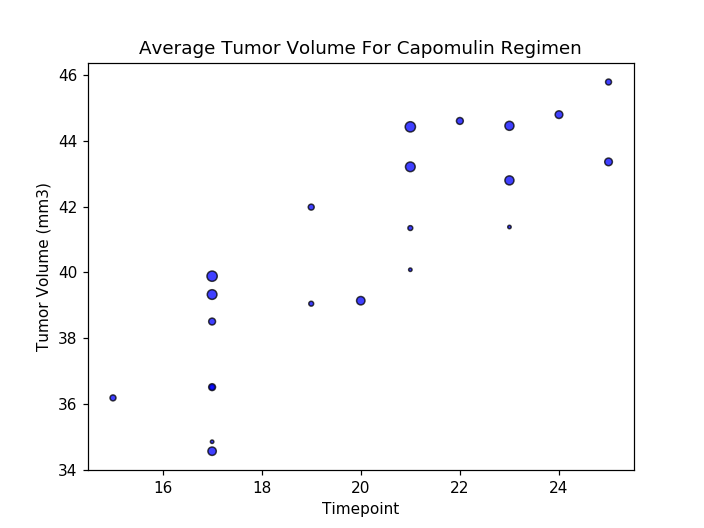

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
sct_df=combine_data.loc[combine_data['Drug Regimen']=='Capomulin']

mouse_weight = sct_df.groupby('Mouse ID').mean()['Weight (g)']
tumor_volume = sct_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
tumor_volume
plt.scatter(mouse_weight, tumor_volume, marker='o', facecolors='blue', edgecolors='black',s=x_axis, alpha=0.75)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume For Capomulin Regimen')
plt.show()

## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
df4 = combine_data[combine_data['Drug Regimen']=='Capomulin']
df4['Weight (g)'].corr(df4['Tumor Volume (mm3)'])


0.5256995552077166

In [58]:
st.linregress(df4['Weight (g)'],df4['Tumor Volume (mm3)'])

LinregressResult(slope=0.9609669432428346, intercept=21.489827213299584, rvalue=0.5256995552077166, pvalue=9.605446629502282e-18, stderr=0.10298279892023657)